<a href="https://colab.research.google.com/github/mfmarlonferrari/appLeituraDataset/blob/main/Book_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/mfmarlonferrari/appLeituraDataset/main/dataset_form.csv')

In [3]:
dataset.head()

,Carimbo de data/hora,Título do Livro Lido:,Com quantos anos você leu esse livro?,Quanto tempo você gastou para ler?(Tempo em meses),Em uma escala o quanto você gostou do livro?,Qual sentimento esse livro provocou em você?
0,2020/10/01 12:37:28 PM GMT-3,Dom Casmurro,13,2.0,5,Reflexão
1,2020/10/01 1:30:35 PM GMT-3,"Sim, Sesinho",13,1.0,5,Alegria
2,2020/10/01 1:34:57 PM GMT-3,Vários,27,300.0,5,Motivação
3,2020/10/01 1:35:47 PM GMT-3,Querido John,15,1.0,5,Raiva
4,2020/10/01 1:36:42 PM GMT-3,Vários,13,1.0,5,Reflexão


In [ ]:
import requests
from bs4 import BeautifulSoup

headers_Get = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) Gecko/20100101 Firefox/49.0',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Language': 'pt-BR,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'DNT': '1',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1'
    }

def buscaLivroGoogle(titulo):
  url = 'https://www.google.com/search?tbo=p&tbm=bks&q=%s&num=10' %titulo.replace(' ','+').replace('Sim','').replace(',','')
  r = requests.get(url, headers=headers_Get)

  soup = BeautifulSoup(r.content,"html.parser")

  titulo_tag = soup.find('h3') 
  titulo_texto = titulo_tag.text

  return titulo_texto

In [ ]:
buscaLivroGoogle('Dom quixote')

'O fidalgo Dom Quixote de La Mancha'

In [ ]:
livros = dataset[dataset.columns[1]]

In [ ]:
nomes_corretos = []
for l in livros:
  nomes_corretos.append(buscaLivroGoogle(l))

In [ ]:
nomes_corretos

['Dom Casmurro: A Novel',
 'Sesinho - Edições 101-103',
 'Nurikabe Grades de Vários Tamanhos - Médio - Volume 9 - 276 ...',
 'Querido John',
 'Nurikabe Grades de Vários Tamanhos - Médio - Volume 9 - 276 ...',
 'O alquimista',
 'Não sou uma dessas',
 "Triumph of the Walking Dead: Robert Kirkman's Zombie Epic on ...",
 'A revolução dos bichos',
 'Percy Jackson e os Ladrões do Olimpo',
 'AGVA News - Volumes 9-14 - Página 16',
 'O Archivo popular - Volume 5 - Página 140',
 'B I B L I O T E C A',
 'O Caçador de Pipas',
 'Sendo-Me presente o extraordinario abuso, com que os ...',
 'O Índio do Brasil na literatura portuguesa dos séculos XVI, ...',
 'Os elefantes não esquecem',
 'Justino, o retirante',
 'O dia do curinga',
 'Princesa das águas: O primeiro desafio',
 'O Pequeno Príncipe',
 'Percorsi formativi nella saga di Harry Potter',
 'O Hobbit',
 'Querido John',
 'A Magia de Arbatel',
 'F*deu Geral',
 'Confissões de uma garota excluída, mal-amada e (um pouco) ...',
 'Maturidade: O Acesso à

In [ ]:
ds_livros = pd.DataFrame(nomes_corretos)

In [ ]:
dataset_livros_correto = dataset.copy()
dataset_livros_correto['titulo_books'] = ds_livros

In [ ]:
dataset_livros_correto.columns

Index(['Carimbo de data/hora', 'Você já leu algum livro? Caso sim, Qual? ',
       'Com quantos anos você leu esse livro?',
       'Quanto tempo você gastou para ler?(Tempo em meses)',
       'Em uma escala o quanto você gostou do livro?',
       'Qual sentimento esse livro provocou em você?', 'titulo_books'],
      dtype='object')

In [ ]:
dataset_livros_correto[[dataset_livros_correto.columns[1], 'titulo_books']].sample(20)

,"Você já leu algum livro? Caso sim, Qual?",titulo_books
65,O Trono de Fogo,O trono de fogo
30,Sim. Jogos Vorazes,Jogos vorazes
81,O grande desafio,O grande desafio
3,Querido John,Querido John
17,"Justino , o retirante","Justino, o retirante"
58,O Martelo de Thor,O martelo de Thor
54,A Marca de Atena,A marca de Atena
100,A casa caiu,Por que a casa cai: do diário de uma monitora ...
68,Inferno,Inferno
71,Harry Potter e a Pedra Filosofal,Harry Potter e a Pedra Filosofal


In [ ]:
!pip install textdistance

In [ ]:
from textdistance import levenshtein

dataset_livros_correto_dist = dataset_livros_correto.assign(distance=[*map(levenshtein.distance, dataset_livros_correto[dataset_livros_correto.columns[0]], dataset_livros_correto['titulo_books'])])

In [ ]:
#Até 52 é uma distancia segura
ds = dataset_livros_correto_dist[dataset_livros_correto_dist['distance'] <= 52]
ds = ds[ds.columns[2:-1]]

In [ ]:
ds.shape

(98, 5)

In [ ]:
ds

,Com quantos anos você leu esse livro?,Quanto tempo você gastou para ler?(Tempo em meses),Em uma escala o quanto você gostou do livro?,Qual sentimento esse livro provocou em você?,titulo_books
0,13,2.0,5,Reflexão,Dom Casmurro: A Novel
1,13,1.0,5,Alegria,Sesinho - Edições 101-103
3,15,1.0,5,Raiva,Querido John
5,23,2.0,5,Reflexão,O alquimista
6,26,1.0,5,Reflexão,Não sou uma dessas
...,...,...,...,...,...
108,22,1.0,5,Paixão,O Escaravelho de Ouro e outras histórias
109,13,9.0,5,Alegria,documentário - WordPress.com
110,20,2.0,5,Reflexão,O Vendedor de Sonhos: O achamento
111,14,3.0,5,Tristeza,"Carandiru: a prisão, o psiquiatra e o preso"


In [ ]:
##from sklearn.preprocessing import LabelEncoder

##le = LabelEncoder().fit(ds.titulo_books)
##ds['ID_LIVRO'] = le.transform(ds.titulo_books)

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#ds[['idade_leitura', 'tempo_gasto']] = scaler.fit_transform(ds[['idade_leitura', 'tempo_gasto']])

In [ ]:
ds.columns = ['idade_leitura', 'tempo_gasto', 'rating', 'sentimento', 'livro']

In [ ]:
ds

,idade_leitura,tempo_gasto,rating,sentimento,livro
0,13,2.0,5,Reflexão,Dom Casmurro: A Novel
1,13,1.0,5,Alegria,Sesinho - Edições 101-103
3,15,1.0,5,Raiva,Querido John
5,23,2.0,5,Reflexão,O alquimista
6,26,1.0,5,Reflexão,Não sou uma dessas
...,...,...,...,...,...
108,22,1.0,5,Paixão,O Escaravelho de Ouro e outras histórias
109,13,9.0,5,Alegria,documentário - WordPress.com
110,20,2.0,5,Reflexão,O Vendedor de Sonhos: O achamento
111,14,3.0,5,Tristeza,"Carandiru: a prisão, o psiquiatra e o preso"


In [ ]:
#ds = pd.get_dummies(ds, columns = ['sentimento'], prefix=['sent_'])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(ds.drop('sentimento', axis=1).drop('livro',axis=1))

In [ ]:
ds['cluster'] = kmeans.labels_

In [ ]:
ds

,idade_leitura,tempo_gasto,rating,sentimento,livro,cluster
0,13,2.0,5,Reflexão,Dom Casmurro: A Novel,4
1,13,1.0,5,Alegria,Sesinho - Edições 101-103,4
3,15,1.0,5,Raiva,Querido John,4
5,23,2.0,5,Reflexão,O alquimista,0
6,26,1.0,5,Reflexão,Não sou uma dessas,0
...,...,...,...,...,...,...
108,22,1.0,5,Paixão,O Escaravelho de Ouro e outras histórias,0
109,13,9.0,5,Alegria,documentário - WordPress.com,4
110,20,2.0,5,Reflexão,O Vendedor de Sonhos: O achamento,0
111,14,3.0,5,Tristeza,"Carandiru: a prisão, o psiquiatra e o preso",4


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


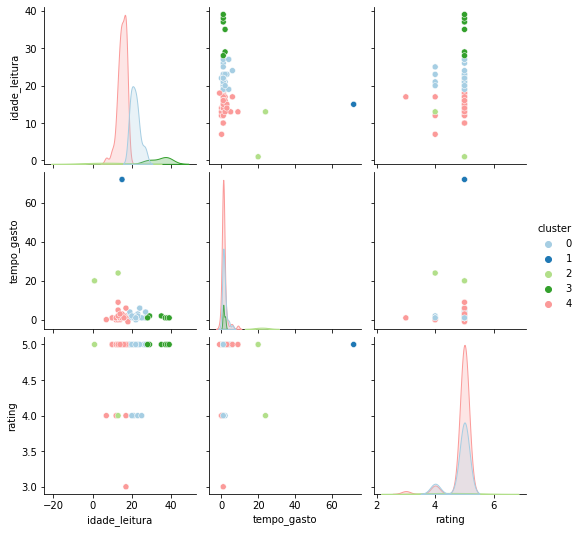

In [ ]:
import seaborn as sns

sns.pairplot(ds[['idade_leitura','tempo_gasto','rating','cluster']], hue='cluster', palette='Paired')

In [ ]:
kmeans.predict([[10,3,5]])

array([4], dtype=int32)

In [ ]:
ds[ds.cluster==4].livro

0                                  Dom Casmurro: A Novel
1                              Sesinho - Edições 101-103
3                                           Querido John
9                   Percy Jackson e os Ladrões do Olimpo
10                  AGVA News - Volumes 9-14 - Página 16
12                                   B I B L I O T E C A
13                                    O Caçador de Pipas
17                                  Justino, o retirante
18                                      O dia do curinga
19                Princesa das águas: O primeiro desafio
20                                    O Pequeno Príncipe
22                                              O Hobbit
29                                 Dom Casmurro: A Novel
30                                         Jogos vorazes
34                                              Um Beijo
35                                 Dom Casmurro: A Novel
37                                        Bichos, bicho!
39                             

In [ ]:
ds.cluster.value_counts()

4    57
0    32
3     6
2     2
1     1
Name: cluster, dtype: int64